## Mesure du temps d'exécution : la méthode naïve avec un chronomètre
L'objectif de cette courte activité est de mesurer le temps d'exécution de quelques fonctions qui implémentent des algorithmes sur des chaînes de caractères ou des nombres.

La technique utilisée est la suivante : on relève la valeur d'un chronomètre juste avant et juste après l'appel à la fonction et on czalcule la différece, appelée `duree`.

Si le temps d'exécution est très court, on effectue $N$ fois l'appel à la fonction à l'aide d'une boucle, et on divise la durée totale par N :

$ duree = \frac{N}{t_f - t_i}$

## Utilisation d'un chronomètre avec Python
On utilisera le modèle suivant pour mesurer la durée d'une opération :
```python
from time import perf_counter

t_init = perf_counter()

# ce dont on souhaite mesurer la durée

t_final = perf_counter()
duree = t_final - t_init

print(f"Durée : {duree} secondes")
```


## Utilisation d'un chronomètre avec c++
On utilisera le modèle suivant pour mesurer la durée d'une opération :
```c++
#include <chrono>
#include <iostream>
#include <ctime>
#include <ratio>

int main() {
	using namespace std::chrono;

	high_resolution_clock::time_point t_init = high_resolution_clock::now();
	
    // ce dont on veut mesurer la durée
    
	high_resolution_clock::time_point t_final = high_resolution_clock::now();
	duration<double> duree = duration_cast<duration<double>>(t_final - t_init);
	std::cout << "Duree =" << duree.count() << " secondes" << std::endl ;

return 0;
}
```

## Objectif du TP
L'objectif de cette activité est de comparer les implémentations python et c++ pour des algorithmes classiques, avec un criètre de temps d'exécution.

## Rappel : Exécution d'un programme c++
On rappelle qu'on utilise le compilateur `g++` pour produire les exécutables, dont la syntaxe est la suivante :

```bash
$ g++ fichier_source.cpp -o executable
```

vérifier que l'exécutable a été correctement généré avec la commande suivante :
```bash
$ ls
```
puis exécuter le programme avec la commande :
```
$ ./executable
```

In [2]:
import matplotlib.pyplot as plt

### Activité 1. Mesure du temps nécessaire pour comparer deux chaines de 10 caractères avec Python - Méthode `perf_counter`
* En utilisant un chronomètre comme expliqué plus haut, effectuer 10000 (dix mille) mesures du temps nécessaire pour comparer deux chaînes de 10 caractères dont seul le dernier diffère
* déterminer le temps mini, le temps maxi, le temps moyen
* représenter sur un graphique l'ensemble de ces temps de calcul
* que constatez-vous ?

Temps mini : 7.399648893624544e-08
Temps maxi : 0.00019766799960052595
Temps moyen : 9.995644650189206e-08


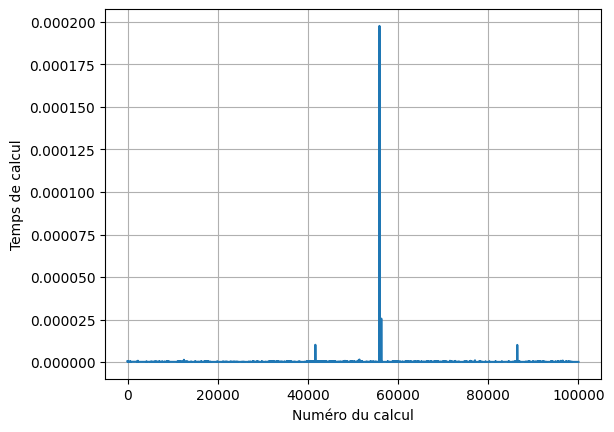

In [4]:
import time
import matplotlib.pyplot as plt

temps_de_calcul = []

N = 100000

for i in range(N):
    t_init = time.perf_counter()
    "abcdefghij" == "abcdefghik"
    t_final = time.perf_counter()
    temps_de_calcul.append(t_final - t_init)

temps_mini = min(temps_de_calcul)
temps_maxi = max(temps_de_calcul)
temps_moyen = sum(temps_de_calcul) / len(temps_de_calcul)

print("Temps mini :", temps_mini)
print("Temps maxi :", temps_maxi)
print("Temps moyen :", temps_moyen)

plt.plot(range(N), temps_de_calcul)
plt.ylabel("Temps de calcul")
plt.xlabel("Numéro du calcul")
plt.grid()
plt.show()

### Activité 2. Mesure du temps nécessaire pour calculer le sinus d'un nombre flottant avec Python - Méthode `time_it`

En utilisant le module `timeit`, 
```python
timer = timeit.Timer(lambda : "abcdefghij" == "abcdefghik")
elapsed = timer.timeit(N)
```
effectuer la mesure et trouver le temps moyen

In [5]:
import timeit

timer = timeit.Timer(lambda : "abcdefghij" == "abcdefghik")

elapsed = timer.timeit(N)

print("Temps moyen :", elapsed / N)

Temps moyen : 5.925598001340404e-08


### Activité 3. Mesure du temps nécessaire pour calculer un sinus avec la méthode cProfile

cProfile est le profiler intégré à Python.
```python
import cProfile

def ff():
    for i in range(N):
        "abcdefghij" == "abcdefghik"
cProfile.run('ff()')
```

In [7]:
import cProfile
import math
def ff():
    for i in range(N):
        math.sin(i)
cProfile.run('ff()')

         100004 function calls in 0.022 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.014    0.014    0.022    0.022 2454247613.py:3(ff)
        1    0.000    0.000    0.022    0.022 <string>:1(<module>)
        1    0.000    0.000    0.022    0.022 {built-in method builtins.exec}
   100000    0.009    0.000    0.009    0.000 {built-in method math.sin}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




### Décorateur `time_it`

In [51]:
import time
import random

def timeit(func):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f'Time taken: {elapsed:.6f} seconds')
        return result
    return wrapper

@timeit
def calculate_pi(n):
    """Calculate and return an approximation of pi using the Monte Carlo method."""
    inside = 0
    for i in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x ** 2 + y ** 2 <= 1:
            inside += 1
    pi = (inside / n) * 4
    return pi

pi = calculate_pi(1000000)
print(pi)

Time taken: 1.310766 seconds
3.141596


### Activité 4. Comparaison c++/python
En utilisant un chronomètre c++, comparer les résultats obtenus avec Pythoni pour l'activité 1. Note: Vous pourrez augmenter N.